# Example to showcase SimplePipeline.py

This example is mainly taken from Géron's book "Hands-On Machine Learning".

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import SimpleDataPipeline as sdp

# load the data
DATA_NAME = "housing"
DATA_DIR = "datasets/"
DATA_URL = "https://raw.githack.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
sdp.fetch_data(DATA_URL, DATA_DIR, DATA_NAME)

housing = sdp.load_data_pd(DATA_DIR, DATA_NAME)

Loaded datasets/housing.csv.


In [2]:
# labels to predict
labels = "median_house_value"

# income categories (bins) for the stratified split
housing["income_cat"] = pd.cut(
        housing["median_income"],
        bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
        labels=[1, 2, 3, 4, 5])
bins = housing["income_cat"]

# rooms per household (attributes 3 and 6) and population per household (attributes 5 and 6) as combined attributes
combine_attrs = [(3, 6), (5, 6)]

In [3]:
# apply the full transform
full_transform = sdp.full_transform(housing, bins, combine_attrs, labels)
housing_train = full_transform["train set"]
housing_test = full_transform["test set"]
housing_labels = full_transform["labels"]

## Models

### Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_train, housing_labels)
housing_lin_reg = lin_reg.predict(housing_train)

In [16]:
# testing the model
some_data = housing_train[:50]
some_labels = housing_labels[:50]
predictions = lin_reg.predict(some_data)
print("Predictions:", predictions)
print("Labels:", list(some_labels))

Predictions: [205953.76345265 329000.78210909 205354.4709924   61778.65214117
 196715.63348024 157038.31384835 424633.00764971 229897.1852463
 141793.65242697   8457.84084357 115624.83190629  90286.16950292
 326578.92076062 109412.81970165 127053.8497975  208825.93707017
 261641.34506145 107353.7499042  148107.18737095 209193.45222157
 224318.00828778 430297.33050436 208029.45498618 155232.35529322
  68292.63009611 141179.28877926 278749.62215001 134492.82241501
 175090.66960001 261938.71492892 294881.78939993 217540.28953261
 154013.85200046 185375.14552144 285488.79493627 318703.70600489
  27404.81553615 189858.87506557 138031.69039983 236581.85869456
 284642.44401647 250855.61246789 221740.77140586 316663.94168946
 200417.32809514 213322.75215062 105103.57533619 274151.24504552
 156559.88330397 266998.99511879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0, 127900.0, 500001.0, 140200.0, 95000.0, 500001.0, 92100.0, 61500.0, 313000.0, 89000.0, 123900.0, 197400.0, 500001.0, 

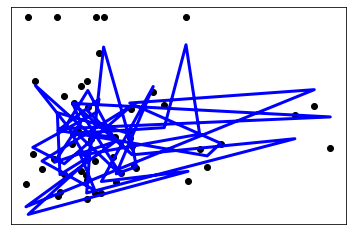

In [17]:
# plot model against data
%matplotlib inline
import matplotlib.pyplot as plt

X_total_rooms = housing_train[:50, 3]
y_test = housing_labels[:50]
y_pred = predictions[:50]

plt.scatter(X_total_rooms, y_test,  color='black')
plt.plot(X_total_rooms, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
# evaluate model
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_labels, housing_lin_reg)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68861.06513863918

### Decision tree regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(housing_train, housing_labels)

DecisionTreeRegressor()

In [22]:
# evaluate the model
housing_pred_dtr = dtr.predict(housing_train)
tree_mse = mean_squared_error(housing_labels, housing_pred_dtr)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [24]:
# cross validation
from sklearn.model_selection import cross_val_score
dtr_scores = cross_val_score(dtr, housing_train, housing_labels, scoring = "neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)

In [25]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [26]:
display_scores(dtr_rmse_scores)

Scores: [70843.18526737 71545.68652246 70089.23182606 69046.03238191
 70368.08049415 75109.58075332 72710.84970185 70627.49501614
 72706.19739132 71410.88253424]
Mean: 71445.72218888247
Standard deviation: 1625.3260274208578


In [28]:
lin_scores = cross_val_score(lin_reg, housing_train, housing_labels, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67638.40689238 66548.1260895  68305.38614099 74436.97830833
 68027.8194507  71669.7388793  65231.9044515  68158.35986257
 72658.04965207 68158.0150069 ]
Mean: 69083.2784734247
Standard deviation: 2736.956317407235


### Random forests

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_train, housing_labels)
housing_pred_forest = forest_reg.predict(housing_train)
forest_mse = mean_squared_error(housing_labels, housing_pred_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18884.1923423497

In [31]:
forest_scores = cross_val_score(forest_reg, housing_train, housing_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49589.86508162 47972.96852873 50832.66899043 52488.27039088
 50027.5104856  54443.74081048 49466.69193274 48513.33467859
 53324.35572545 51536.48749552]
Mean: 50819.58941200562
Standard deviation: 2002.4720143624932


## Dumping the models

In [ ]:
import joblib

joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(dtr, "dtr.pkl")
joblib.dump(forest_reg, "forest_reg.pkl")